#Multi-Armed Bandits
We use the 10-armed bandits testbench to see how different value-strategies perform on the same and their parameters

## ϵ-greedy strategy

In [49]:
import random
import matplotlib.pyplot as plt
import numpy as np

for now, reward is just a normally distributed random number, also I have not defined an optimal probability distribution in the beginning.

In [54]:
# Bandit simulation function
def bandit(action):
    """Simulate the reward for each action (arm) with a normal distribution."""
    return np.random.normal(loc=action, scale=1)  # Adjust the scale for variability


1000 time steps, three epsilons to test over
next, the true_rewards and optimal action(based on greedy algorithm) is defined

In [57]:
# Parameters
steps = 2000  # Number of steps
k = 10  # Number of arms (actions)
epsilons = [0, 0.01, 0.1]  # Different epsilon values to test

# True reward values for each action (unknown to the agent)
true_rewards = [bandit(a) for a in range(k)]  # Simulate true rewards of each action

# Optimal action is the one with the highest true reward (for reference)
optimal_action = np.argmax(true_rewards)  # Action that maximizes the true reward

# Storage for plotting
average_rewards = {epsilon: [] for epsilon in epsilons}

The actual bandit loop using the e-greedy algorithm

In [58]:
# Bandit Loop for each epsilon value
for epsilon in epsilons:
    Q = [0] * k  # Estimated values for each arm (action) as a list
    N = [0] * k  # Number of times each arm has been chosen as a list
    cumulative_reward = 0  # Total cumulative reward
    optimal_action_count = 0  # Count of optimal actions taken

    # Simulation over steps
    for step in range(steps):
        # Epsilon-greedy action selection
        if random.random() < epsilon:  # Exploration
            A = random.randint(0, k - 1)  # Randomly pick an arm
        else:  # Exploitation
            max_value = max(Q)  # Find the arm with the maximum estimated reward, Q is a list
            candidates = [a for a, value in enumerate(Q) if value == max_value]  # Resolve ties randomly
            A = random.choice(candidates)

        # Get reward for the selected action
        R = bandit(A)
        cumulative_reward += R

        # Update the number of times this arm was selected
        N[A] += 1
        Q[A] = Q[A] + (1 / N[A]) * (R - Q[A])  # Update estimated reward using incremental formula

        # Track if the optimal action was selected
        if A == optimal_action:
            optimal_action_count += 1

        # Track average reward
        average_rewards[epsilon].append(cumulative_reward / (step + 1))

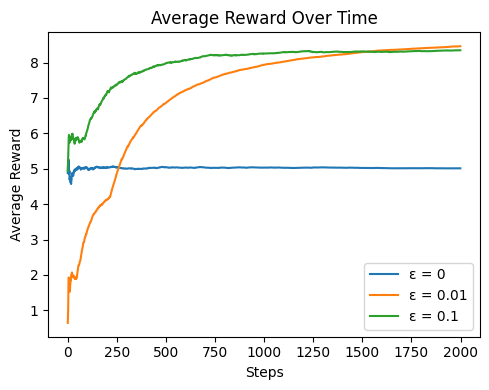

In [59]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(5,4))

# Plot average reward for each epsilon value
for epsilon in epsilons:
    ax.plot(average_rewards[epsilon], label=f"ε = {epsilon}")
ax.set_title("Average Reward Over Time")
ax.set_xlabel("Steps")
ax.set_ylabel("Average Reward")
ax.legend()

plt.tight_layout()
plt.show()


##Optimistic ϵ-greedy

In [ ]:
# Bandit environment setup
num_actions = 10  # Number of arms (actions)
total_steps = 1000  # Number of steps (iterations)
best_action = 2  # Assume action 2 is optimal for the sake of example
initial_value = 5  # Optimistic initial value for all arms

# Variables for tracking performance
reward_per_step = {0: [], 0.01: [], 0.1: []}  # Track average rewards for each epsilon
best_action_percentage = {0: [], 0.01: [], 0.1: []}  # Track percentage of optimal action chosen for each epsilon

In [ ]:
# Loop through different epsilon values (0, 0.01, 0.1)
for epsilon in [0, 0.01, 0.1]:
    # Initialize action-value estimates and counts for each epsilon
    action_values = [initial_value] * num_actions
    action_counts = [0] * num_actions
    total_reward = 0

    # Bandit loop with optimistic initial values for each epsilon
    for step in range(total_steps):
        # Epsilon-greedy strategy
        if random.random() < epsilon:  # Explore
            chosen_action = random.randint(0, num_actions - 1)
        else:  # Exploit
            highest_value = max(action_values)  # Find the arm with the maximum estimated reward
            candidates = [index for index, value in enumerate(action_values) if value == highest_value]  # Resolve ties randomly
            chosen_action = random.choice(candidates)  # Choose randomly among the arms with the max value

        # Simulate reward for the selected action (for simplicity, assume normal distribution)
        reward = random.gauss(0, 1) if chosen_action != best_action else random.gauss(1, 1)  # Reward is higher for the best action

        # Update counts and estimated rewards
        action_counts[chosen_action] += 1
        action_values[chosen_action] = action_values[chosen_action] + (1 / action_counts[chosen_action]) * (reward - action_values[chosen_action])  # Incremental formula to update action value

        # Track performance metrics for each epsilon
        total_reward += reward
        reward_per_step[epsilon].append(total_reward / (step + 1))
        best_action_percentage[epsilon].append(100 * (action_counts[best_action] / (step + 1)))  # Percentage of time the best action was chosen

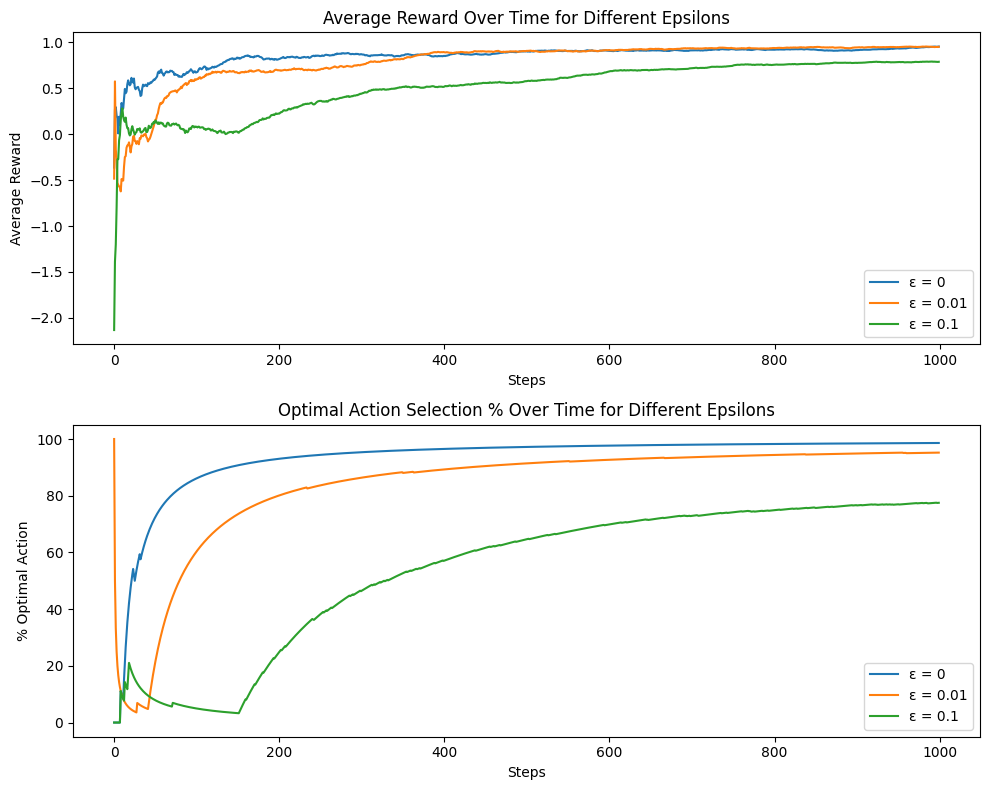

In [66]:
# Plotting the results for all epsilon values
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot of average reward over time for each epsilon
for epsilon in [0, 0.01, 0.1]:
    ax[0].plot(reward_per_step[epsilon], label=f"ε = {epsilon}")
ax[0].set_title("Average Reward Over Time for Different Epsilons")
ax[0].set_xlabel("Steps")
ax[0].set_ylabel("Average Reward")
ax[0].legend()

# Plot of percentage of optimal action selected over time for each epsilon
for epsilon in [0, 0.01, 0.1]:
    ax[1].plot(best_action_percentage[epsilon], label=f"ε = {epsilon}")
ax[1].set_title("Optimal Action Selection % Over Time for Different Epsilons")
ax[1].set_xlabel("Steps")
ax[1].set_ylabel("% Optimal Action")
ax[1].legend()

plt.tight_layout()
plt.show()


##Upper-Confidence-Bound

In [68]:
import math

In [79]:
# UCB Bandit setup
num_actions = 10  # Number of arms (actions)
total_steps = 1000  # Number of steps (iterations)
best_action = 2  # Assume action 2 is optimal for the sake of example
initial_value = 5  # Optimistic initial value for all arms

# Variables for tracking performance
reward_per_step_ucb = []  # Track average rewards for UCB
best_action_percentage_ucb = []  # Track percentage of optimal action chosen for UCB

# Initialize action-value estimates and counts for UCB
action_values_ucb = [initial_value] * num_actions
action_counts_ucb = [0] * num_actions
total_reward_ucb = 0

In [80]:
# Bandit loop with UCB for optimistic initial values(change it to 0 if wanted)
for step in range(1, total_steps + 1):  # Start from step 1 to avoid division by zero
    # UCB strategy
    ucb_values = [action_values_ucb[i] + (2 * (math.log(step) / action_counts_ucb[i]))**0.5 if action_counts_ucb[i] > 0 else float('inf') for i in range(num_actions)]
    chosen_action_ucb = ucb_values.index(max(ucb_values))  # Select the action with the highest UCB value

    # Simulate reward for the selected action (for simplicity, assume normal distribution)
    reward_ucb = random.gauss(0, 1) if chosen_action_ucb != best_action else random.gauss(1, 1)  # Reward is higher for the best action

    # Update counts and estimated rewards
    action_counts_ucb[chosen_action_ucb] += 1
    action_values_ucb[chosen_action_ucb] = action_values_ucb[chosen_action_ucb] + (1 / action_counts_ucb[chosen_action_ucb]) * (reward_ucb - action_values_ucb[chosen_action_ucb])  # Incremental formula to update action value

    # Track performance metrics for UCB
    total_reward_ucb += reward_ucb
    reward_per_step_ucb.append(total_reward_ucb / step)
    best_action_percentage_ucb.append(100 * (action_counts_ucb[best_action] / step))  # Percentage of time the best action was chosen


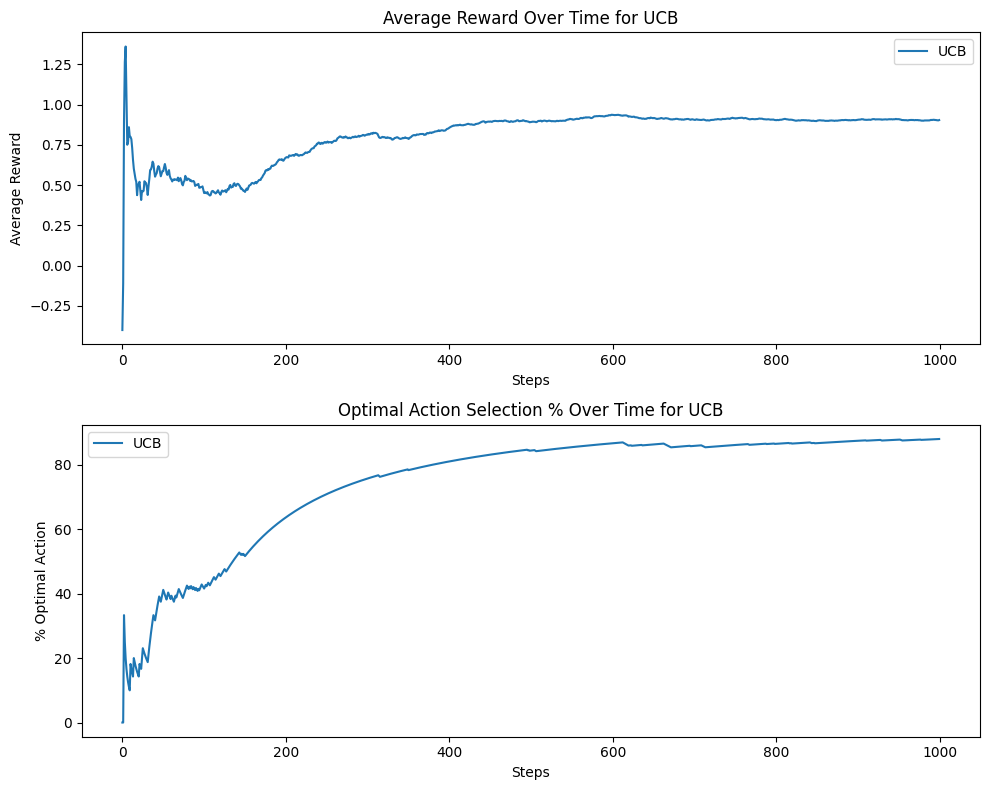

In [81]:
# Plotting the results for UCB
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot of average reward over time for UCB
ax[0].plot(reward_per_step_ucb, label="UCB")
ax[0].set_title("Average Reward Over Time for UCB")
ax[0].set_xlabel("Steps")
ax[0].set_ylabel("Average Reward")
ax[0].legend()

# Plot of percentage of optimal action selected over time for UCB
ax[1].plot(best_action_percentage_ucb, label="UCB")
ax[1].set_title("Optimal Action Selection % Over Time for UCB")
ax[1].set_xlabel("Steps")
ax[1].set_ylabel("% Optimal Action")
ax[1].legend()

plt.tight_layout()
plt.show()


With a optimistic initial value, we are forcing exploration, and also we see that the average rewards are high initially, but they start to drop eventually and finally settle down.

##Gradient Bandits

In [86]:
steps = 1000  # Total steps
k = 10         # Number of arms (bandit options)
alphas = [0.1, 0.5, 0.01]  # Different values of alpha to try
grad_rewards = []  # Track rewards over time

In [87]:
# Loop over different alphas
for alpha in alphas:
    # Initialize preferences and counts for each alpha
    H = np.zeros(k)  # Preferences for each arm
    average_reward = 0
    grad_rewards = []  # Track rewards for this alpha

    # Gradient Bandits algorithm loop
    for step in range(steps):
        # Softmax selection probabilities
        exp_preferences = np.exp(H)
        pi = exp_preferences / np.sum(exp_preferences)  # Probabilities of selecting each arm

        # Choose action based on probabilities
        A = np.random.choice(range(k), p=pi)

        # Get reward for the selected arm
        R = bandit(A)
        average_reward += (R - average_reward) / (step + 1)  # Running average of rewards

        # Update preferences for the chosen arm
        for a in range(k):
            if a == A:
                H[a] += alpha * (R - average_reward) * (1 - pi[a])
            else:
                H[a] -= alpha * (R - average_reward) * pi[a]

        # Track the cumulative reward (average reward)
        grad_rewards.append(average_reward)

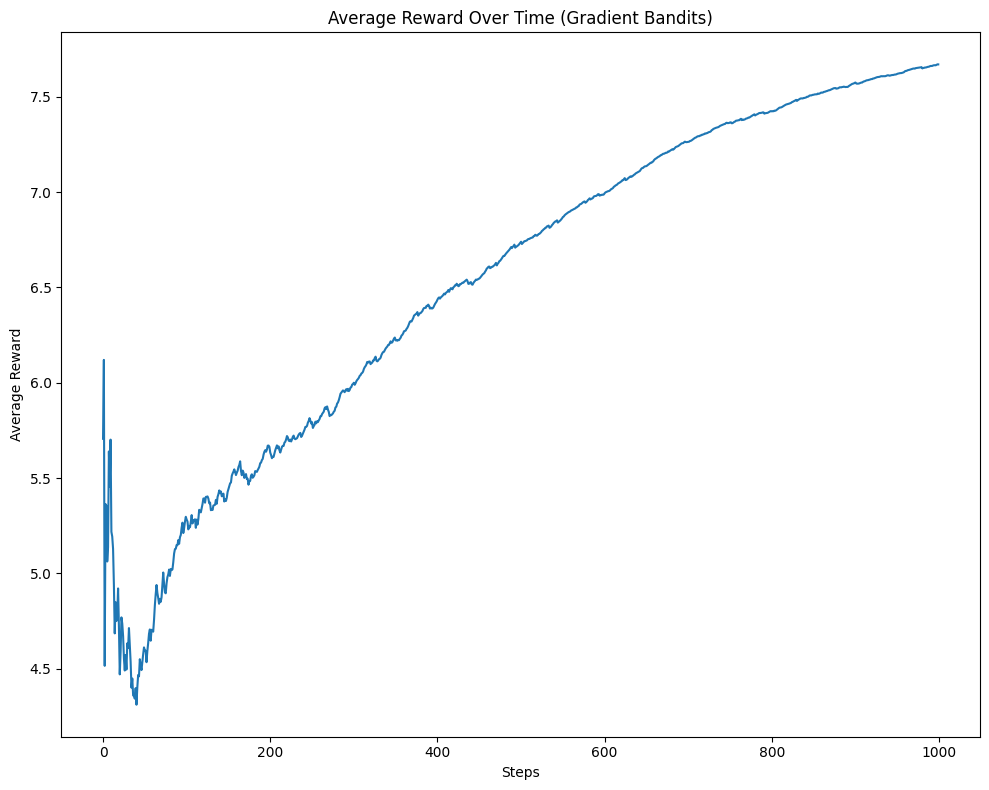

In [88]:
# Plotting Results
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plot Average Reward Over Time for Gradient Bandits
ax.plot(grad_rewards)
ax.set_title("Average Reward Over Time (Gradient Bandits)")
ax.set_xlabel("Steps")
ax.set_ylabel("Average Reward")

plt.tight_layout()
plt.show()
